## Required Librares

In [1]:
import tensorflow as tf
from docx import Document
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.callbacks import EarlyStopping, History
import numpy as np
from joblib import dump

## Data From Word Docs

In [2]:
# Path to the Word document
file_path = r"D:\Python\My_ML_&_DL\DL\dataset\LSTM.docx"

# Load the Word document
doc = Document(file_path)

# Initialize an empty string to store the extracted text
extracte_text = ''' '''

# Iterate through each paragraph in the document and extract text
for paragraph in doc.paragraphs:
    extracte_text += paragraph.text + "\n"

# Print the extracted text
print("Text extracted from the Word document:")

Text extracted from the Word document:


In [3]:
df_text = extracte_text
print(len(df_text))

109614


## Dividing data by Line led to splitting by "."

In [4]:
data = df_text.split('.')
len(data)

676

In [5]:
data[500]

' Challenges and Opportunities in Healthcare and Nutrition**\n\nDespite significant advancements in healthcare and nutrition, numerous challenges persist, ranging from healthcare disparities and access barriers to food insecurity, dietary inequalities, and misinformation surrounding nutrition and wellness'

### Removing \n and * from data

In [6]:
a = '\n'
b = '*'

new_data = []

count_n = 0
count_star = 0
count_n2 = 0  # Initialize count_n2
count_star2 = 0  # Initialize count_star2

for sentence in data:
    count_n += sentence.count(a)  # Count the occurrences of newline characters
    count_star += sentence.count(b)  # Count the occurrences of asterisks
    
    # Replace newline characters and asterisks with spaces in the sentence
    sentence = sentence.replace(a, ' ')
    sentence = sentence.replace(b, ' ')
    
    # Split the sentence into words based on whitespace
    words = sentence.split()
    
    # Join the words back together with a single space between them
    new_sentence = ' '.join(words)

    new_data.append(new_sentence)
    
    count_n2 += sentence.count(a)  # Update count_n2 after replacement
    count_star2 += sentence.count(b)  # Update count_star2 after replacement

print("Initial counts:")
print("Newline characters:", count_n)
print("Asterisks:", count_star)
print("Counts after replacement:")
print("Newline characters:", count_n2)
print("Asterisks:", count_star2)

Initial counts:
Newline characters: 724
Asterisks: 812
Counts after replacement:
Newline characters: 0
Asterisks: 0


In [7]:
new_data[500]

'Challenges and Opportunities in Healthcare and Nutrition Despite significant advancements in healthcare and nutrition, numerous challenges persist, ranging from healthcare disparities and access barriers to food insecurity, dietary inequalities, and misinformation surrounding nutrition and wellness'

## Assigning each of total unique word a unique number (using TOKENIEZER)

In [8]:
word_num = Tokenizer()
word_num.fit_on_texts(new_data)

In [9]:
print(len(word_num.word_index))
unique_word = len(word_num.word_index)
word_dict = word_num.word_index

3124


### Vector representation of each sentence

In [10]:
for sentence in new_data:
    print(word_num.texts_to_sequences([sentence]))

[[86, 999, 579, 7, 2, 1545, 3, 86, 29, 6, 472, 1546, 5, 393, 580]]
[[11, 6, 323, 80, 473, 1000, 3, 152, 86, 29, 394, 3, 2, 1547, 121, 5, 2, 22]]
[[20, 59, 153, 122, 231, 1, 324, 1001, 325, 34, 6, 1548, 1002, 3, 474, 1, 6, 87, 581, 27, 2, 19, 475]]
[[1549, 86, 29, 1550, 10, 1551, 4, 2, 1552, 395, 1, 1553, 4, 2, 1003, 1554, 4, 2, 1555, 1, 1556, 1, 1557, 4, 2, 739]]
[[4, 2, 393, 34, 29, 1558, 10, 2, 67, 1559, 740, 34, 6, 154, 1560]]
[[23, 40, 88, 1561, 2, 1562, 1563, 1564, 476, 5, 2, 1003, 2, 1004, 1005, 1565, 1006, 2, 1566, 1007, 5, 2, 1008, 1, 1009, 1010, 1567, 5, 2, 393]]
[[23, 80, 29, 266, 10, 2, 105, 1, 1011, 3, 477, 1568, 1, 396, 45, 2, 1569, 1570, 1571, 1, 1572, 396]]
[[34, 582, 98, 6, 87, 1573, 8, 134, 1, 583, 1012, 1574, 12, 61, 2, 584]]
[[2, 1575, 3, 326, 585, 9, 7, 2, 741, 1576, 1577, 1, 1013, 742, 4, 1014, 586, 15, 1578, 8, 397]]
[[86, 1579, 1015, 327, 12, 741, 586, 27, 1580, 1581, 1016, 1017, 6, 1582, 1, 1583, 398, 742, 10, 1018, 587, 1019, 1020, 1021, 1022, 1, 1023, 1024, 10

## Making our supervised kind table

In [11]:
input_sentence = []

for sentence in new_data:
    token_sentence = word_num.texts_to_sequences([sentence])[0]

    for i in range(1,len(token_sentence)):
        input_sentence.append(token_sentence[:i+1])

In [12]:
input_sentence

[[86, 999],
 [86, 999, 579],
 [86, 999, 579, 7],
 [86, 999, 579, 7, 2],
 [86, 999, 579, 7, 2, 1545],
 [86, 999, 579, 7, 2, 1545, 3],
 [86, 999, 579, 7, 2, 1545, 3, 86],
 [86, 999, 579, 7, 2, 1545, 3, 86, 29],
 [86, 999, 579, 7, 2, 1545, 3, 86, 29, 6],
 [86, 999, 579, 7, 2, 1545, 3, 86, 29, 6, 472],
 [86, 999, 579, 7, 2, 1545, 3, 86, 29, 6, 472, 1546],
 [86, 999, 579, 7, 2, 1545, 3, 86, 29, 6, 472, 1546, 5],
 [86, 999, 579, 7, 2, 1545, 3, 86, 29, 6, 472, 1546, 5, 393],
 [86, 999, 579, 7, 2, 1545, 3, 86, 29, 6, 472, 1546, 5, 393, 580],
 [11, 6],
 [11, 6, 323],
 [11, 6, 323, 80],
 [11, 6, 323, 80, 473],
 [11, 6, 323, 80, 473, 1000],
 [11, 6, 323, 80, 473, 1000, 3],
 [11, 6, 323, 80, 473, 1000, 3, 152],
 [11, 6, 323, 80, 473, 1000, 3, 152, 86],
 [11, 6, 323, 80, 473, 1000, 3, 152, 86, 29],
 [11, 6, 323, 80, 473, 1000, 3, 152, 86, 29, 394],
 [11, 6, 323, 80, 473, 1000, 3, 152, 86, 29, 394, 3],
 [11, 6, 323, 80, 473, 1000, 3, 152, 86, 29, 394, 3, 2],
 [11, 6, 323, 80, 473, 1000, 3, 152, 86, 

In [13]:
max_len = []
for i in input_sentence:
    max_len.append(len(i))

maximum_length = max(max_len)

In [14]:
# Pad sequences to a maximum length of maximum_length with padding value 0
padded_sequences = pad_sequences(input_sentence, maxlen=maximum_length, padding='pre')

print("Padded Sequences:")
padded_sequences

Padded Sequences:


array([[   0,    0,    0, ...,    0,   86,  999],
       [   0,    0,    0, ...,   86,  999,  579],
       [   0,    0,    0, ...,  999,  579,    7],
       ...,
       [   0,    0,    0, ..., 1544,  578,    5],
       [   0,    0,    0, ...,  578,    5,   96],
       [   0,    0,    0, ...,    5,   96,  313]])

In [15]:
x = padded_sequences[:, :-1]
y = padded_sequences[:, -1]

In [16]:
print(x)

[[   0    0    0 ...    0    0   86]
 [   0    0    0 ...    0   86  999]
 [   0    0    0 ...   86  999  579]
 ...
 [   0    0    0 ...    1 1544  578]
 [   0    0    0 ... 1544  578    5]
 [   0    0    0 ...  578    5   96]]


In [17]:
print(y)
print(y.shape)

[999 579   7 ...   5  96 313]
(13980,)


#### as in prediction we would be prediction out of listed words in dictonary only so it is classification task

### Converting y to OHE

In [18]:
y = to_categorical(y, num_classes=unique_word)

In [19]:
# Split data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Split training set into training and validation sets (75% train, 25% validation)
_, x_val, _, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [20]:
print(y)
print('\n',y.shape)
print('\n',x.shape)
input_len = int(x.shape[1])
print(input_len)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

 (13980, 3124)

 (13980, 58)
58


## The Architecture

#### embedding ---> LSTM ---> neural network

In [21]:
word_predictor = keras.Sequential([
    
    keras.layers.Embedding(input_dim=unique_word, output_dim=100, input_length= input_len),  
    keras.layers.LSTM(150),
    keras.layers.Dense(unique_word, activation='softmax')
    
])

#loss = tf.keras.losses.categorical_crossentropy
word_predictor.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


In [22]:
word_predictor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 58, 100)           312400    
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 3124)              471724    
                                                                 
Total params: 934724 (3.57 MB)
Trainable params: 934724 (3.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define history callback to store training metrics
history = History()

# Train the model with early stopping and history
history = word_predictor.fit(x, y, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping, history])

Epoch 1/100


437/437 [==============================] - 32s 66ms/step - loss: 6.8916 - accuracy: 0.0824 - val_loss: 6.4415 - val_accuracy: 0.1016
Epoch 2/100
437/437 [==============================] - 27s 62ms/step - loss: 6.3404 - accuracy: 0.1172 - val_loss: 6.1226 - val_accuracy: 0.1348
Epoch 3/100
437/437 [==============================] - 27s 62ms/step - loss: 6.0232 - accuracy: 0.1407 - val_loss: 5.7334 - val_accuracy: 0.1538
Epoch 4/100
437/437 [==============================] - 27s 62ms/step - loss: 5.6502 - accuracy: 0.1619 - val_loss: 5.3013 - val_accuracy: 0.1795
Epoch 5/100
437/437 [==============================] - 27s 63ms/step - loss: 5.2674 - accuracy: 0.1839 - val_loss: 4.9106 - val_accuracy: 0.2006
Epoch 6/100
437/437 [==============================] - 27s 63ms/step - loss: 4.9131 - accuracy: 0.2058 - val_loss: 4.5611 - val_accuracy: 0.2214
Epoch 7/100
437/437 [==============================] - 28s 63ms/step - loss: 4.5864 - accuracy: 0.2263 - val_loss: 4.2474 - val_

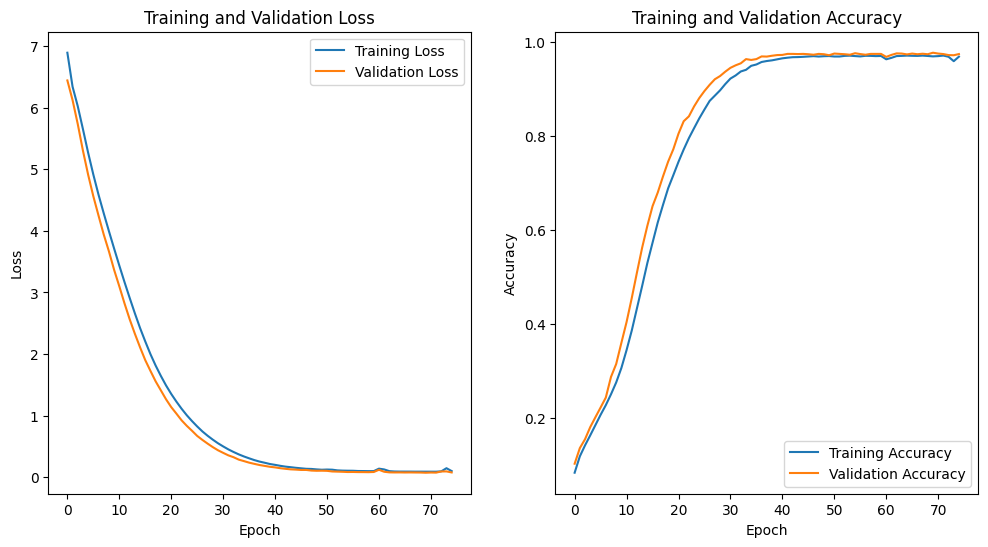

In [24]:
# Plot loss curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [25]:
# Save the model
dump(word_predictor, 'word_predictor_model.joblib')

['word_predictor_model.joblib']

In [26]:
def prediction(text,n=1):

    for i in range(n):
        outcome = word_num.texts_to_sequences([text])[0]
        padded_input = pad_sequences([outcome], maxlen=input_len, padding='pre')
        output = np.argmax(word_predictor.predict(padded_input))
        
        for word, index in word_dict.items():  # Use items() to iterate over key-value pairs
            if index == output:
                text = text + " " + word

    print(text)

In [46]:
text = input()

prediction(text,10)

 politics


1/1 [==============================] - 0s 43ms/step
politics navigating power governance and diplomacy politics shapes the dynamics of
